# Predict the house Price 

Importing all libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.datasets import fetch_california_housing

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

C:\Users\asus\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


creating a DataFrame

In [2]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
Df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([Df.values[::2, :], Df.values[1::2, :2]])
target = Df.values[1::2, 2]

#Drop allrow having null value 

In [3]:
Df=Df.dropna()

#After the delete row reindex from 1 to len(Df)

In [4]:
Df.index = pd.RangeIndex(start=1, stop=len(Df) + 1, step=1)

#Rename the columns name according to required 

In [5]:
Df=Df.rename(columns={0:"CRIM",1:"ZN",2:"INDUS",3:"CHAS",4:'NOX',5:"RM",6:"AGE",7:"DIS",8:"RAD",9:"TAX",10:'PTRATIO'})

In [6]:
Df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO
1,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
2,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8
4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7
5,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7


#### columns information

#Adding the target columns into the dataframe 

In [7]:
Df['PRICE']=target

In [8]:
Df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,PRICE
502,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,22.4
503,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,20.6
504,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,23.9
505,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,22.0
506,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,11.9


In [9]:
Df.shape

(506, 12)

In [10]:
Df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
PRICE      float64
dtype: object

Total number of unique value in each column

In [11]:
Df.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
PRICE      229
dtype: int64

In [12]:
# number of null value in each columns
Df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
PRICE      0
dtype: int64

In [13]:
# show all the statistics data 
Df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,50.000000


#Correlation betweeen features

In [14]:
Df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.468536


<Axes: >

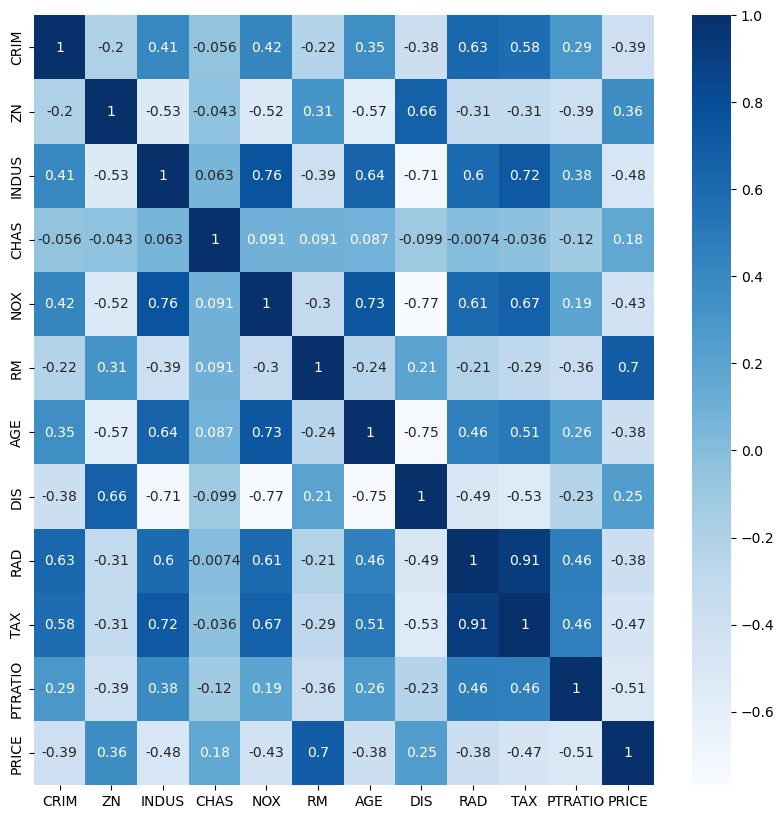

In [21]:
plt.figure(figsize=(10,10))
sns.heatmap(data=Df.corr(),annot=True,cmap='Blues')  # change the colour of map 'cmap='Greens

Export the dataset 

In [ ]:
Df.to_csv('boston_datset.csv',)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Program

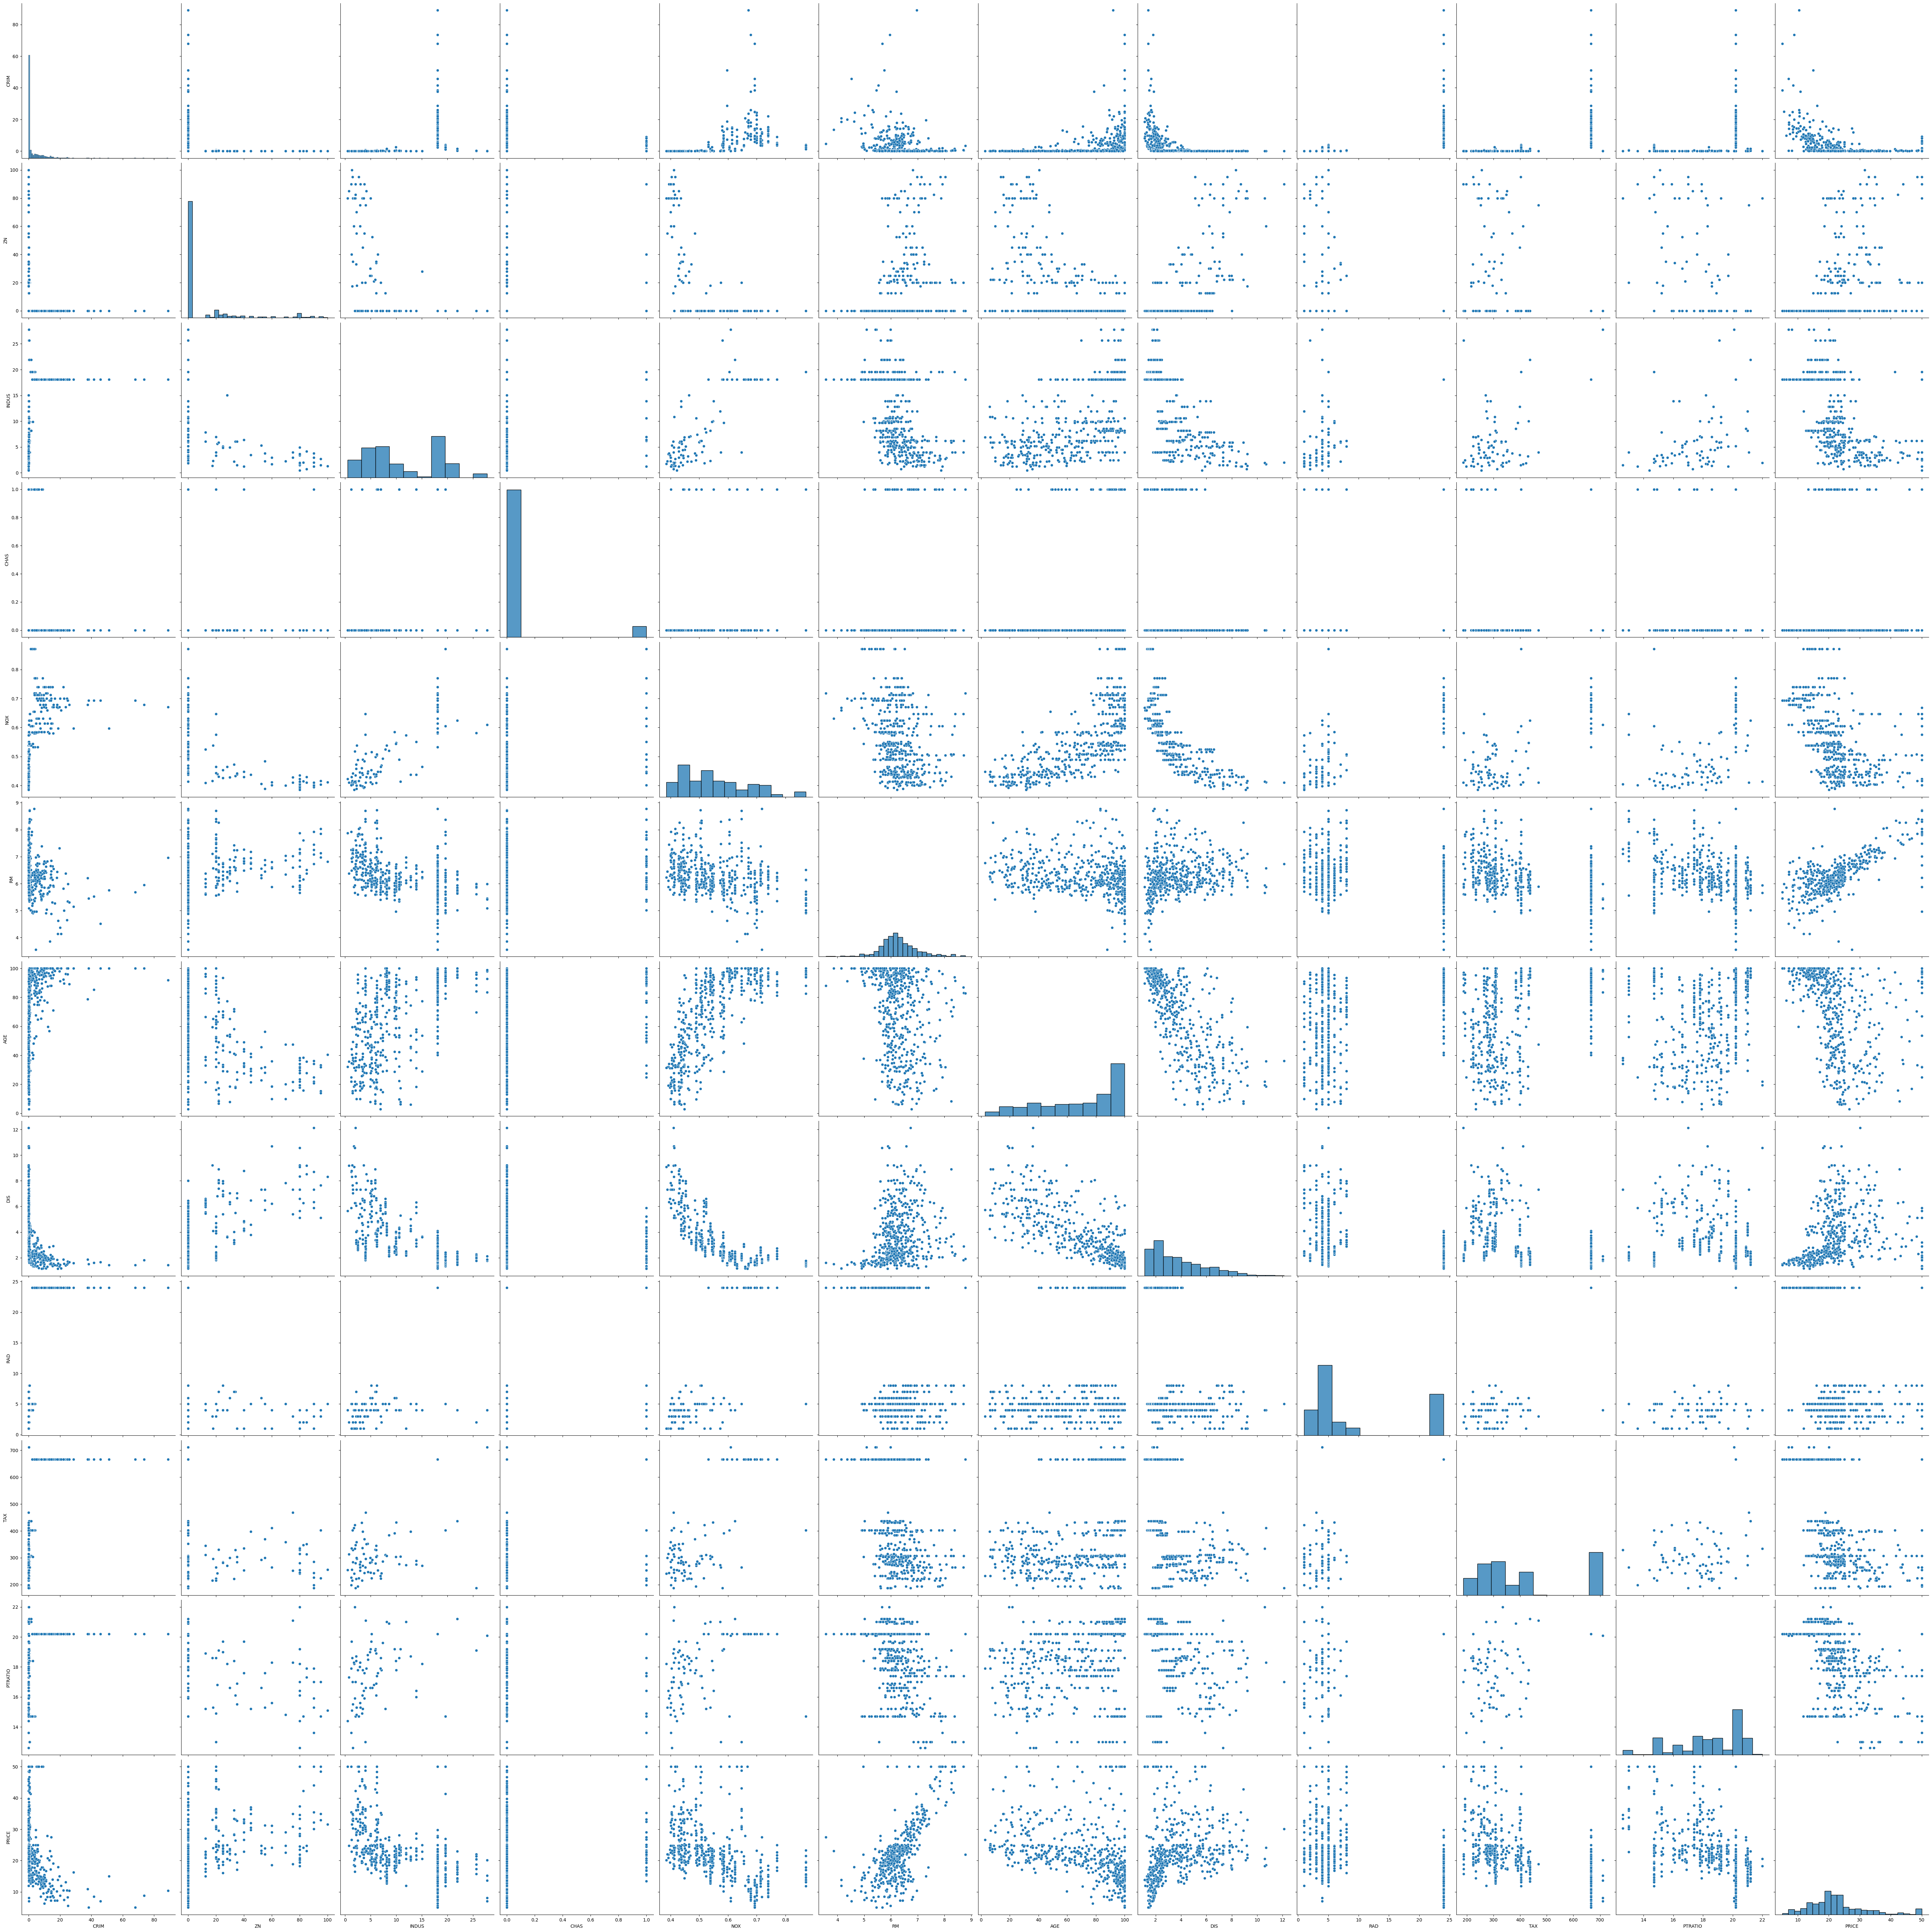

In [22]:
sns.pairplot(Df,size=5)

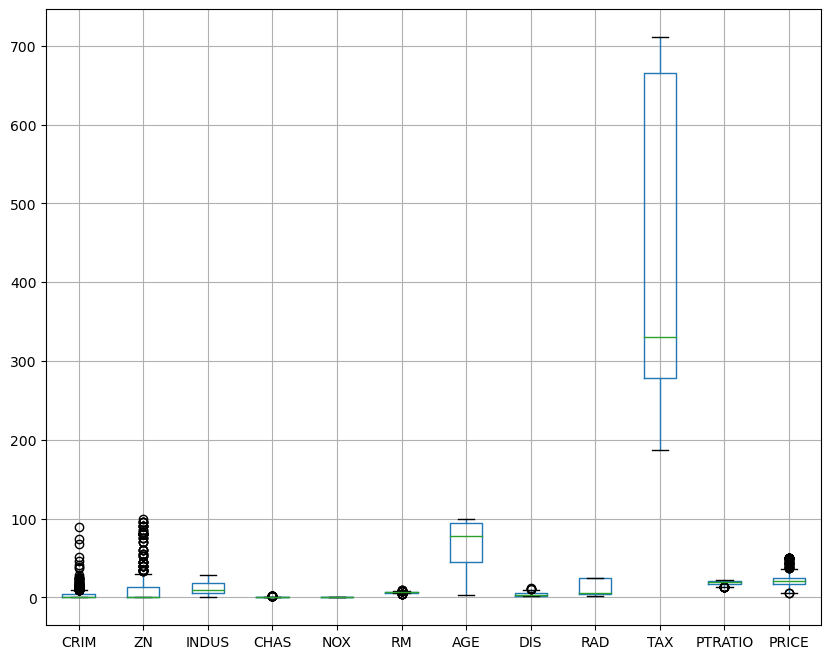

In [29]:
#box plot
plt.figure(figsize=(10,8))
plt.grid()
#plt.boxplot(Df)
Df.boxplot()
plt.show()


In [15]:
#Minumum price 
min(Df['PRICE'])

5.0

In [16]:
#Maximum Price 
Df['PRICE'].max()

50.0

In [17]:
#Standard Deviation 
Df['PRICE'].std()

9.197104087379818

### Machine learning - Linear Regression

In [18]:
# split the data into features and target

x=np.array(Df[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO']])
y=np.array(Df['PRICE'])

#splitting the data 



In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [20]:
len(x_train)

404

In [21]:
len(y_train)

404

In [22]:
len(x_test)

102

In [23]:
len(y_test)

102

### Choosing the model

In [24]:
model=LinearRegression()

Fitting /Train the model

In [25]:
model.fit(x_train,y_train)

LinearRegression()

In [26]:
#intercept value
model.intercept_

23.440379188260113

In [27]:
#Coefficient value
model.coef_

array([-1.64495578e-01,  2.04783261e-02, -1.94174080e-02,  4.06432743e+00,
       -2.34268691e+01,  6.60720755e+00, -4.54342140e-02, -1.52260177e+00,
        1.87093157e-01, -1.03458164e-02, -9.67149799e-01])

### Prediction

In [28]:
y_test

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8, 21.5,
       18.9,  7. , 21.2, 18.5, 29.8, 18.8, 10.2, 50. , 14.1, 25.2, 29.1,
       12.7, 22.4, 14.2, 13.8, 20.3, 14.9, 21.7, 18.3, 23.1, 23.8, 15. ,
       20.8, 19.1, 19.4, 34.7, 19.5, 24.4, 23.4, 19.7, 28.2, 50. , 17.4,
       22.6, 15.1, 13.1, 24.2, 19.9, 24. , 18.9, 35.4, 15.2, 26.5, 43.5,
       21.2, 18.4, 28.5, 23.9, 18.5, 25. , 35.4, 31.5, 20.2, 24.1, 20. ,
       13.1, 24.8, 30.8, 12.7, 20. , 23.7, 10.8, 20.6, 20.8,  5. , 20.1,
       48.5, 10.9,  7. , 20.9, 17.2, 20.9,  9.7, 19.4, 29. , 16.4, 25. ,
       25. , 17.1, 23.2, 10.4, 19.6, 17.2, 27.5, 23. , 50. , 17.9,  9.6,
       17.2, 22.5, 21.4])

In [29]:
y_pred=model.predict(x_test)

In [30]:
y_pred

array([27.7589207 , 35.76514029, 14.76781951, 24.23160279, 17.44065166,
       23.60106081, 19.46588762, 18.15876436, 20.34143821, 20.41543447,
       27.20928613, 19.98686501,  0.18234   , 22.77837689, 17.86083248,
       25.19428753, 20.7081018 ,  7.67535749, 41.34213596, 15.85217409,
       26.82803727, 29.81426449, 14.7811578 , 23.47526512, 15.67548185,
       13.96926039, 21.96422362, 19.26147905, 24.99942119, 18.68150225,
       22.05117108, 23.89862848, 24.07367934, 10.36281048, 18.24535156,
       15.62464311, 30.10048029, 19.05991987, 26.64091362, 25.47652847,
       16.04747794, 31.43831805, 43.63664247, 18.26941786, 26.96317919,
       14.0149346 , 15.33631678, 26.6124169 , 19.16099418, 27.7394169 ,
       20.72120991, 34.05694826, 18.09790765, 25.03794263, 38.43781035,
       20.15914192, 16.37873458, 31.26643672, 25.6952844 , 14.80340606,
       23.27958814, 30.76106412, 30.11154996, 16.41415944, 19.322352  ,
       20.53067404, 19.12251892, 25.28998058, 29.50336326, 15.24

### Testing the model performance

In [31]:
#accuracy 60%
model.score(x_test,y_test)

0.6041513582037019

In [32]:
#accuracy
r2_score(y_test,y_pred)

0.6041513582037019

In [ ]:
#Adjusted R squared


In [33]:
#MSE
mean_squared_error(y_test,y_pred)

29.029078461798083

In [34]:
#MAE
mean_absolute_error(y_test,y_pred)

3.3433412612595843

In [35]:
#RMSE
np.sqrt(mean_squared_error(y_test,y_pred))

5.38786399807921

Text(0.5, 1.0, 'Actual value V/S Predicted Price')

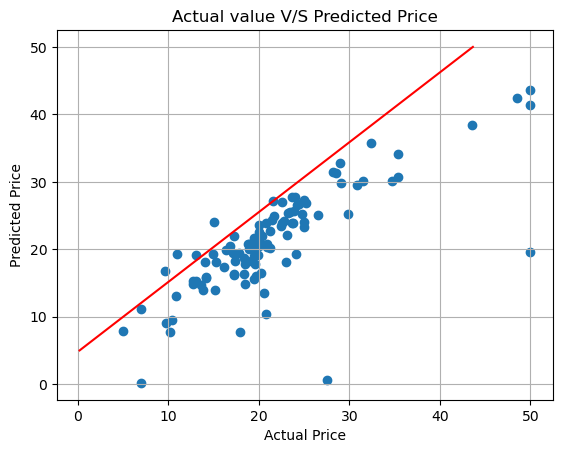

In [44]:
#plot the graph b/w testing and predicting data
plt.grid()
plt.scatter(y_test,y_pred)
plt.plot([min(y_pred),max(y_pred)],[min(y_test),max(y_test)],color='red')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual value V/S Predicted Price")

###### klib library

In [42]:
import klib
from sklearn.datasets import load_diabetes,load_iris

In [48]:
df=pd.read_csv('https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/train.csv')

In [44]:
df.columns=load_iris().feature_names

In [46]:
df['Cat']=load_iris().target

In [49]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


GridSpec(6, 5)

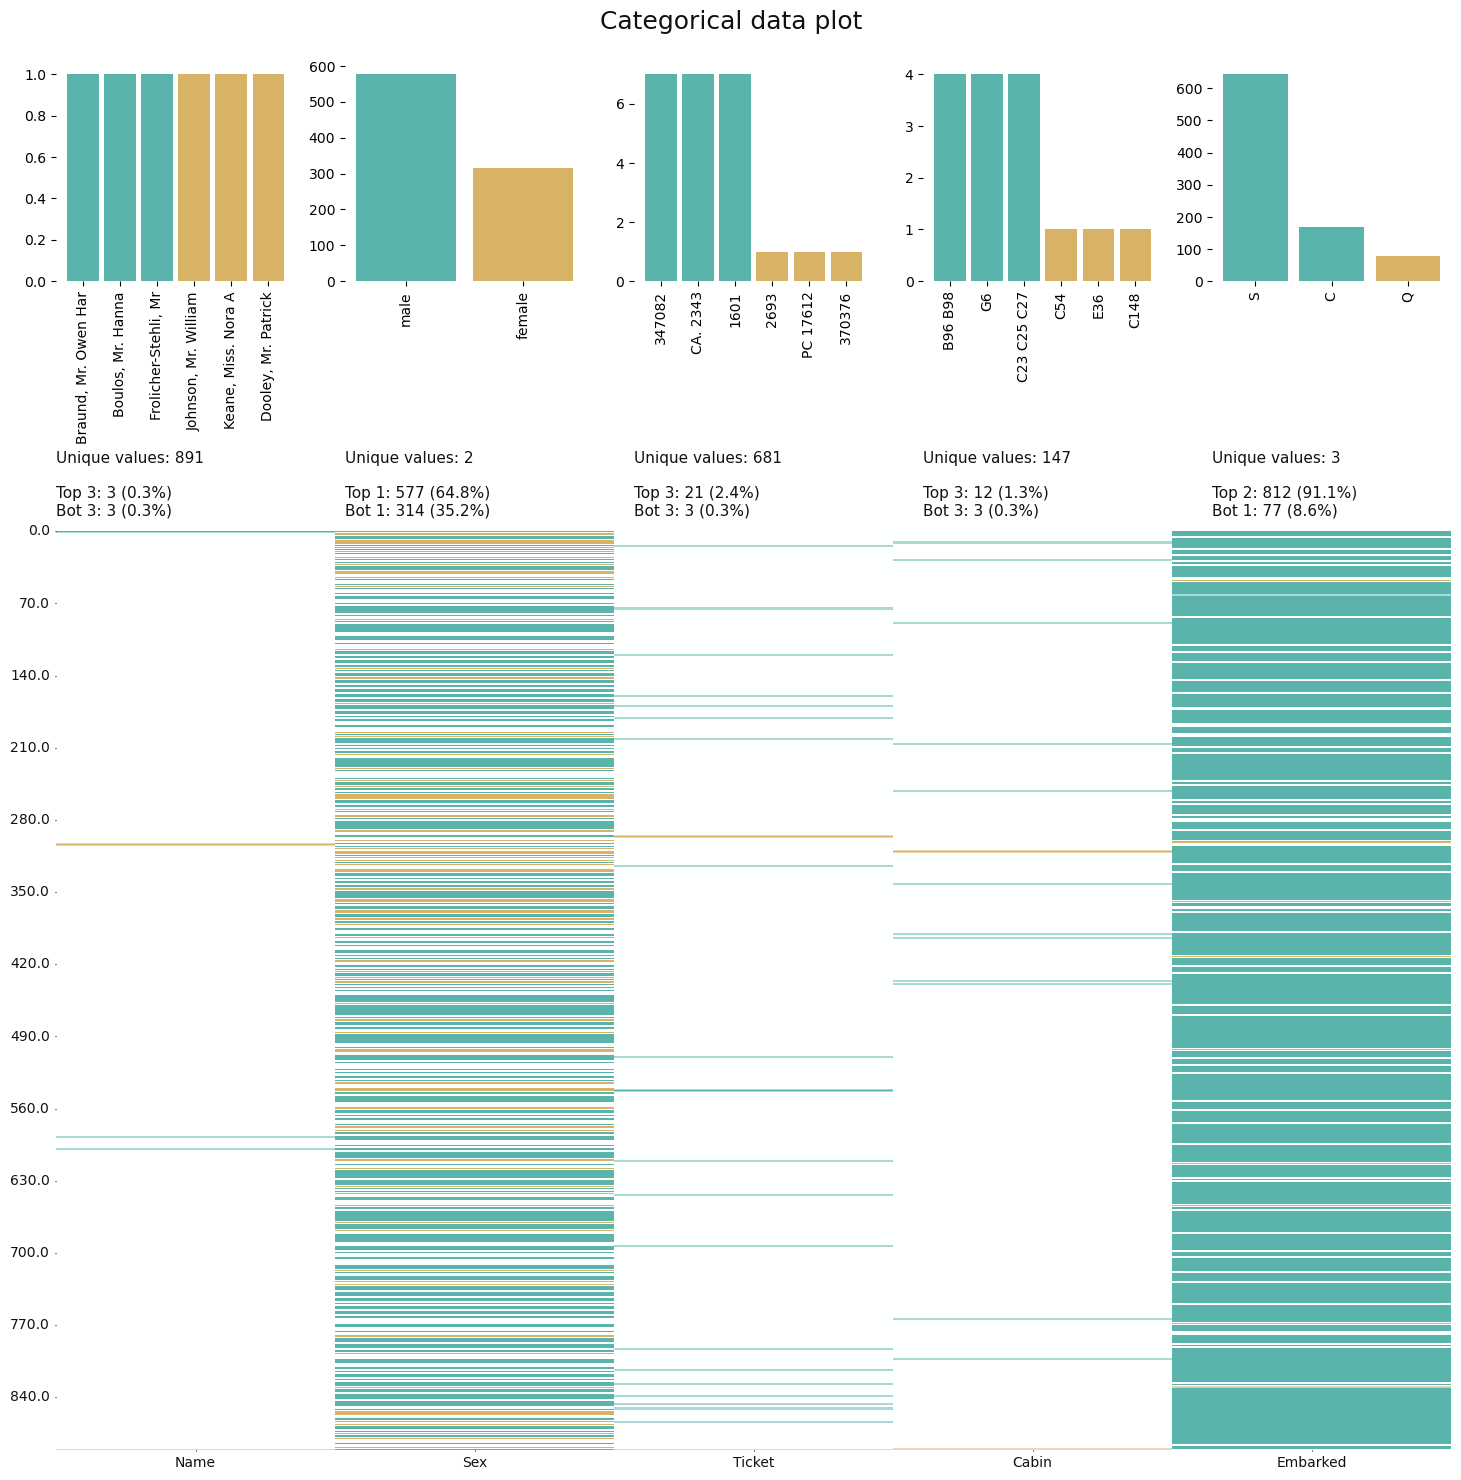

In [50]:
# klib.describe - functions for visualizing datasets
klib.cat_plot(df) # returns a visualization of the number and frequency of categorical features

In [51]:
klib.corr_mat(df) # returns a color-encoded correlation matrix

C:\Users\asus\AppData\Roaming\Python\Python311\site-packages\klib\describe.py:275: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  return corr.style.applymap(color_negative_red).format("{:.2f}", na_rep="-")


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.00,-0.01,-0.04,0.04,-0.06,-0.00,0.01
Survived,-0.01,1.00,-0.34,-0.08,-0.04,0.08,0.26
Pclass,-0.04,-0.34,1.00,-0.37,0.08,0.02,-0.55
Age,0.04,-0.08,-0.37,1.00,-0.31,-0.19,0.10
SibSp,-0.06,-0.04,0.08,-0.31,1.00,0.41,0.16
Parch,-0.00,0.08,0.02,-0.19,0.41,1.00,0.22
Fare,0.01,0.26,-0.55,0.10,0.16,0.22,1.00


<Axes: title={'center': 'Feature-correlation (pearson)'}>

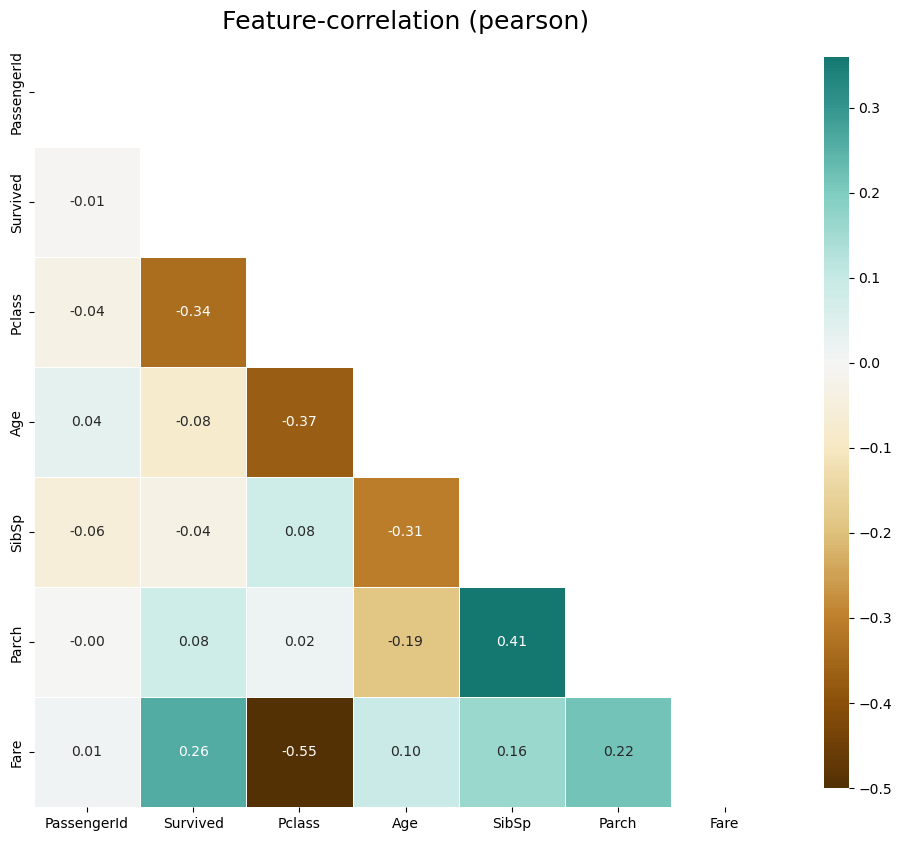

In [52]:
klib.corr_plot(df) # returns a color-encoded heatmap, ideal for correlations

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to

<Axes: xlabel='Fare', ylabel='Density'>

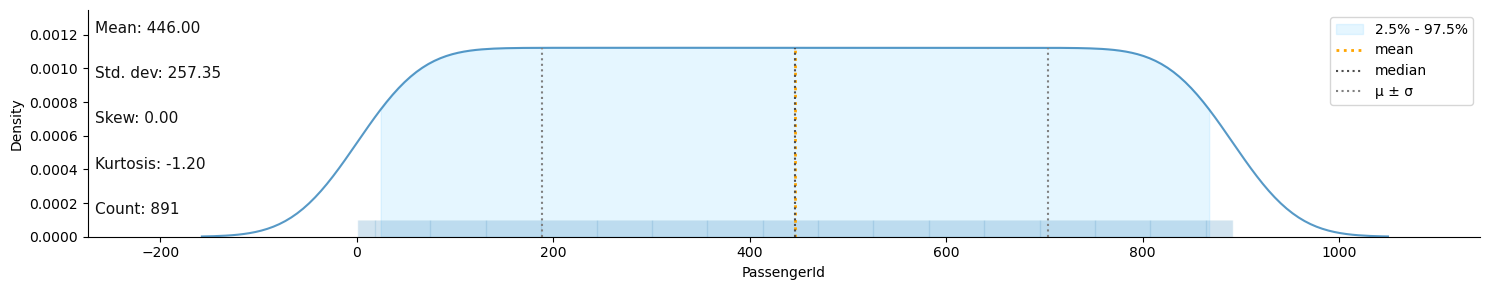

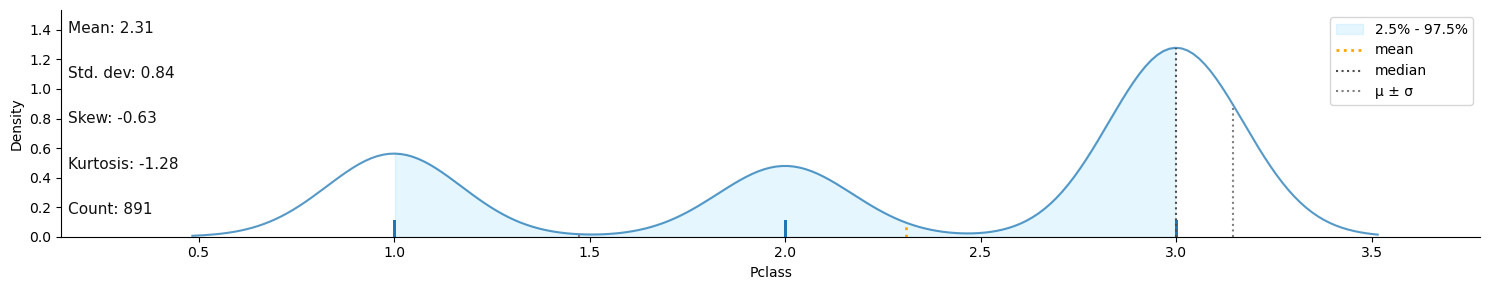

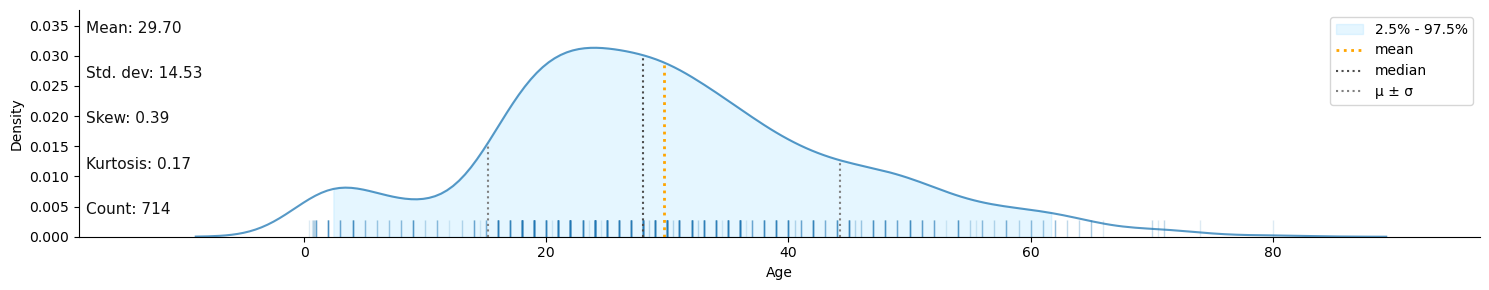

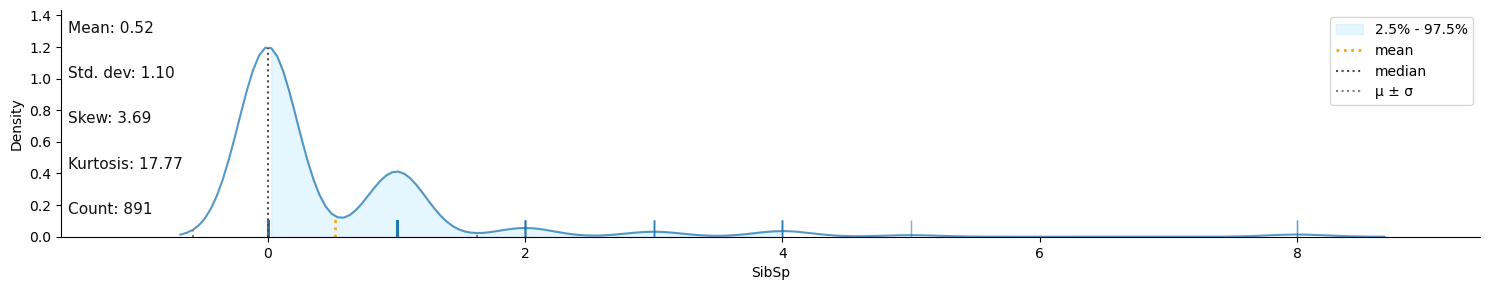

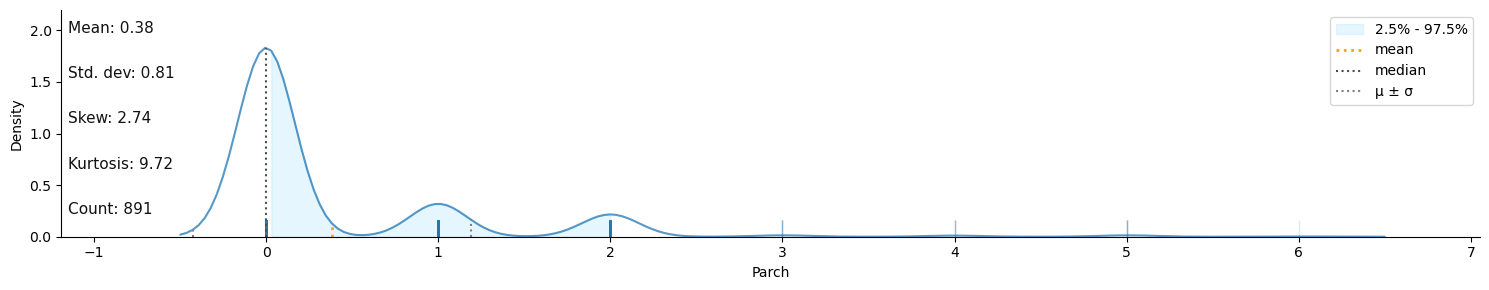

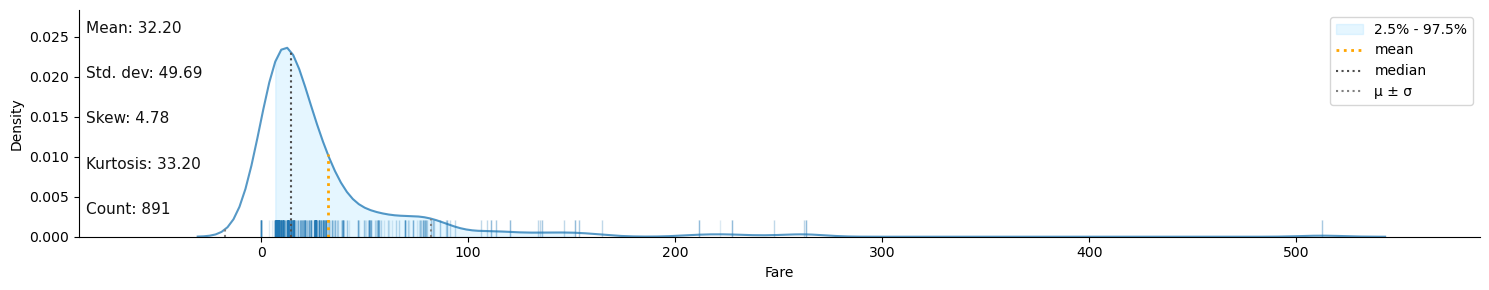

In [54]:
#klib.corr_interactive_plot(df, split="neg").show() # returns an interactive correlation plot using plotly
klib.dist_plot(df) # returns a distribution plot for every numeric feature

GridSpec(6, 6)

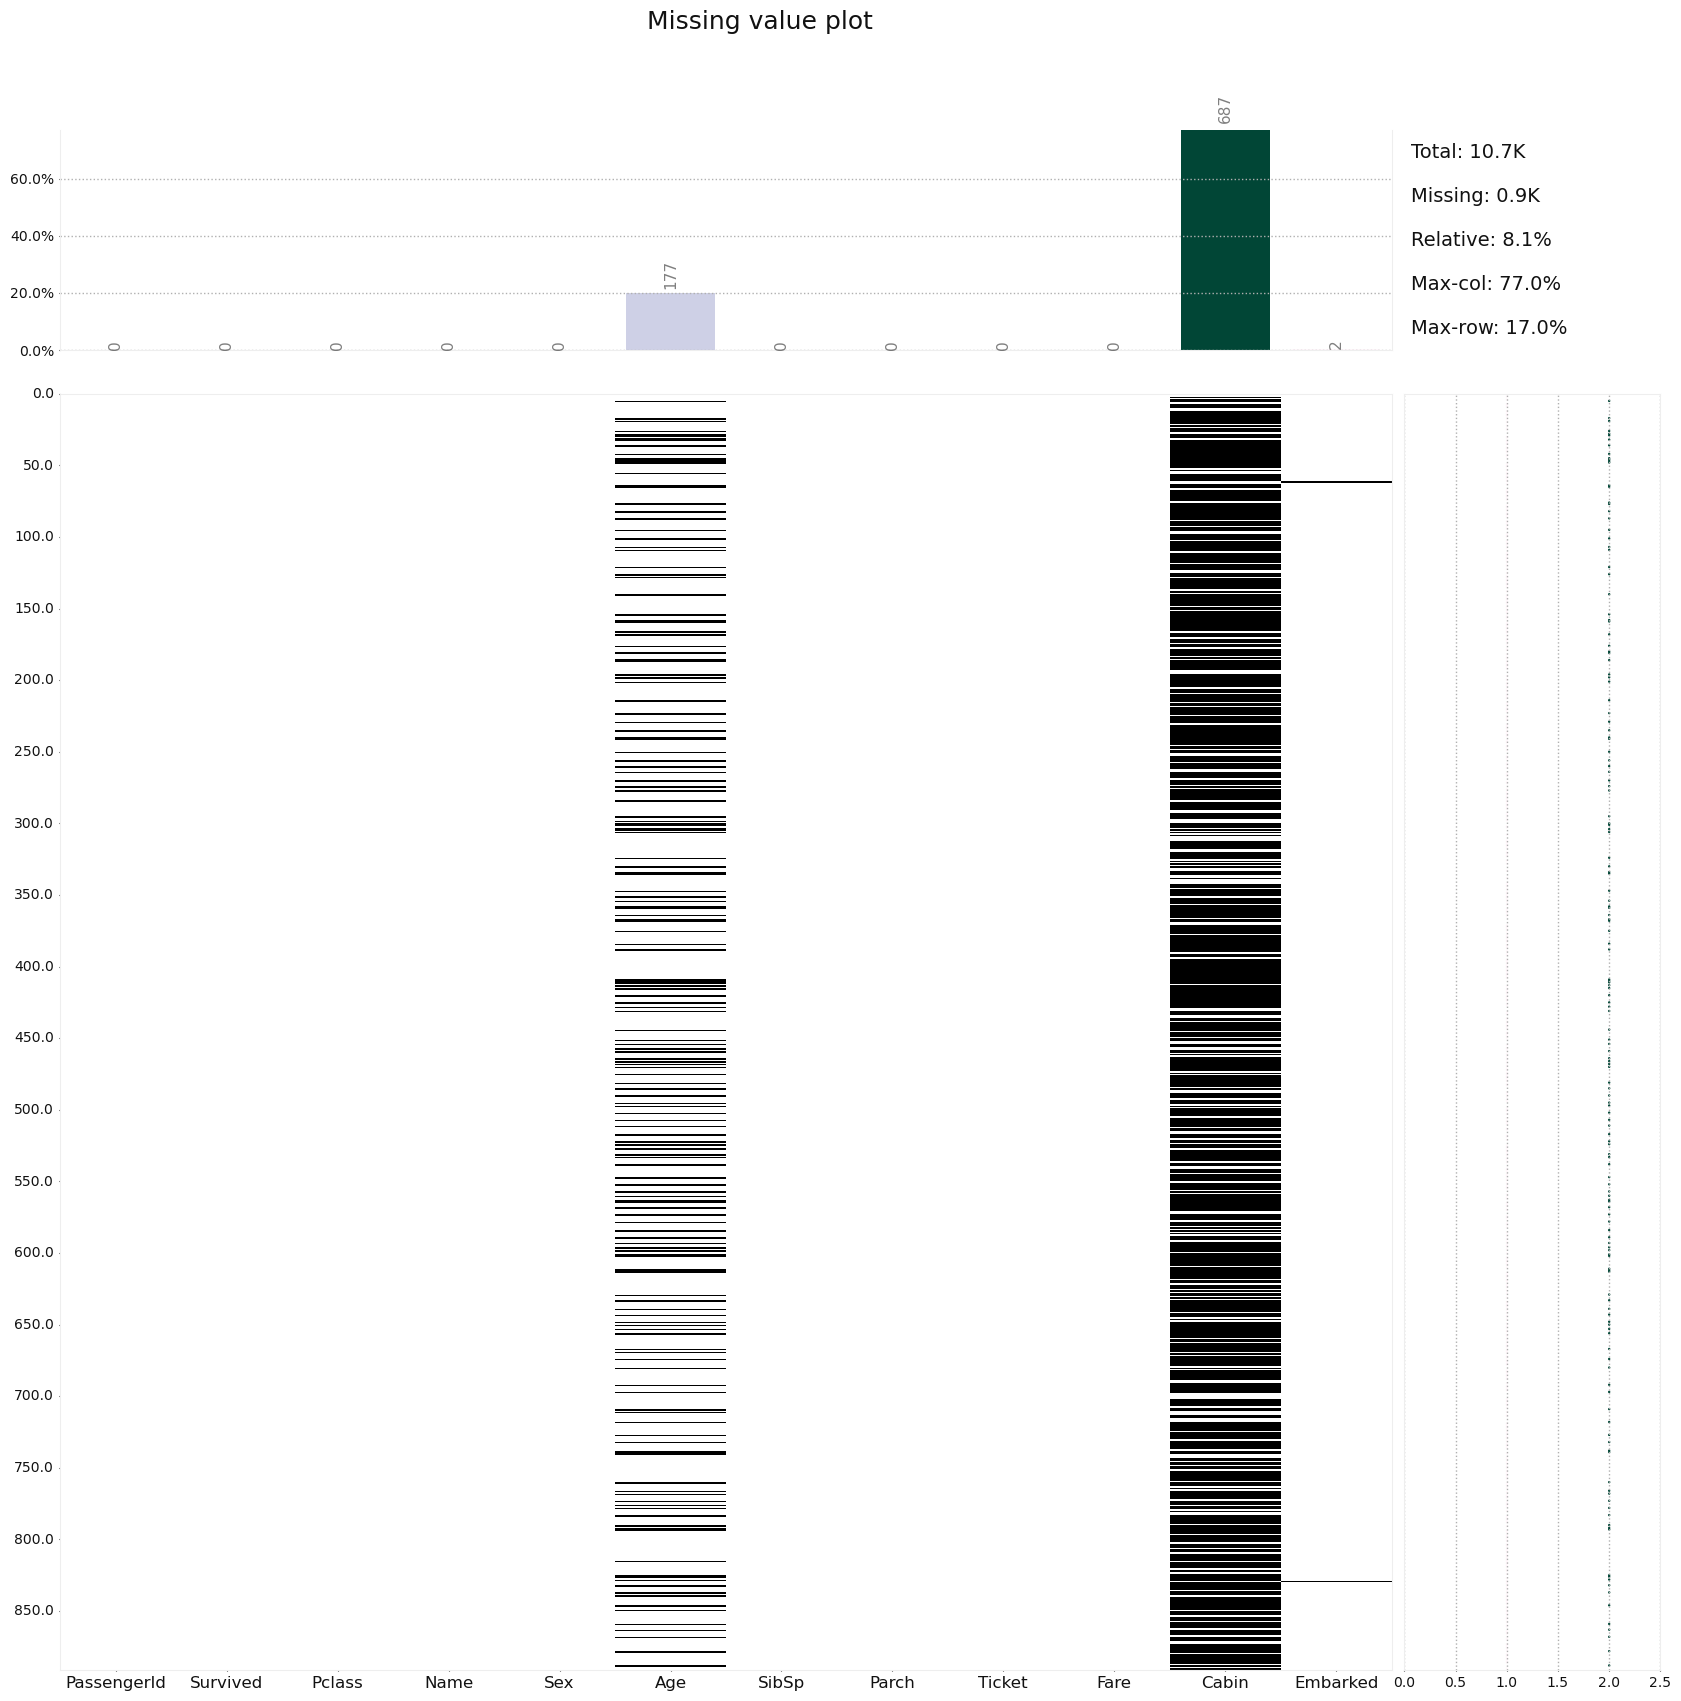

In [55]:
klib.missingval_plot(df) # returns a figure containing information about missing values

In [ ]:
# klib.clean - functions for cleaning datasets
- klib.data_cleaning(df) # performs datacleaning (drop duplicates & empty rows/cols, adjust dtypes,...)
- klib.clean_column_names(df) # cleans and standardizes column names, also called inside data_cleaning()
- klib.convert_datatypes(df) # converts existing to more efficient dtypes, also called inside data_cleaning()
- klib.drop_missing(df) # drops missing values, also called in data_cleaning()
- klib.mv_col_handling(df) # drops features with high ratio of missing vals based on informational content
- klib.pool_duplicate_subsets(df) # pools subset of cols based on duplicates with min. loss of information

### another alternative dataset 

In [17]:
housing = fetch_california_housing()           #.data
df=pd.DataFrame(housing.data, columns=housing.feature_names) 

### columns information

EDA - Exploratory Data Analysis


In [23]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
